<a href="https://colab.research.google.com/github/bitaq/My-Project/blob/main/Sentiment_Analysis_of_McDonald's_Reviews_using_IBM_Granite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_raw = pd.read_csv('/content/drive/MyDrive/Capstone Project/McDonald_s_Reviews.csv', encoding='latin1')
df_raw.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


In [ ]:
df_raw.nunique()

,0
reviewer_id,33396
store_name,2
category,1
store_address,40
latitude,39
longitude,39
rating_count,51
review_time,39
review,22285
rating,5


In [ ]:
df_raw = df_raw.drop_duplicates(subset=['review'])
df_raw.nunique()

,0
reviewer_id,22285
store_name,2
category,1
store_address,40
latitude,39
longitude,39
rating_count,47
review_time,38
review,22285
rating,5


In [ ]:
df_raw['store_address'].value_counts()

,count
store_address,
"9814 International Dr, Orlando, FL 32819, United States",1132
"3501 Biscayne Blvd, Miami, FL 33137, United States",998
"632 S R L Thornton Freeway Service Rd, Dallas, TX 75203, United States",985
"72-69 Kissena Blvd, Queens, NY 11367, United States",955
"5725 W Irlo Bronson Memorial Hwy, Kissimmee, FL 34746, United States",941
"By Mandalay Bay, 3999 S Las Vegas Blvd, Las Vegas, NV 89119, United States",931
"210 5th S, Salt Lake City, UT 84106, United States",884
"490 8th Ave, New York, NY 10001, United States",863
"429 7th Ave, New York, NY 10001, United States",718


In [ ]:
df_raw = df_raw[df_raw['store_address'] == '6875 Sand Lake Rd, Orlando, FL 32819, United States'].copy()
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, 13570 to 26514
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    460 non-null    int64  
 1   store_name     460 non-null    object 
 2   category       460 non-null    object 
 3   store_address  460 non-null    object 
 4   latitude       460 non-null    float64
 5   longitude      460 non-null    float64
 6   rating_count   460 non-null    object 
 7   review_time    460 non-null    object 
 8   review         460 non-null    object 
 9   rating         460 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 39.5+ KB


In [ ]:
df_raw.nunique()

,0
reviewer_id,460
store_name,2
category,1
store_address,1
latitude,1
longitude,1
rating_count,2
review_time,27
review,460
rating,5


# Preprocessing

In [ ]:
df = df_raw[['review']]
df.head()

,review
13570,"Great experience. Food was great, the ice crea..."
13571,The staffs were very friendly and our food was...
13572,Love the world's largest McDonald's. Has a ki...
13573,My experience visiting this place was not good...
13574,This McDonaldï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½...


## Regex

In [ ]:
import re

def regex(text):
    text = str(text)
    # Hapus URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Hapus mention @
    text = re.sub(r'@\w+', '', text)
    # Hapus hashtag
    text = re.sub(r'#', '', text)
    # Hapus karakter yang bukan huruf, angka, spasi, dan tanda ekspresif ! atau ?
    text = re.sub(r'[^a-zA-Z0-9\s!?]', '', text)
    # Lowercase
    text = text.lower()
    # Hapus extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Terapkan ke kolom review
df.loc[:, "clean"] = df["review"].map(regex)
df.head()

/tmp/ipython-input-2467781019.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "clean"] = df["review"].map(regex)


,review,clean
13570,"Great experience. Food was great, the ice crea...",great experience food was great the ice cream ...
13571,The staffs were very friendly and our food was...,the staffs were very friendly and our food was...
13572,Love the world's largest McDonald's. Has a ki...,love the worlds largest mcdonalds has a kids p...
13573,My experience visiting this place was not good...,my experience visiting this place was not good...
13574,This McDonaldï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½...,this mcdonalds is one of the nicest and cooles...


# Exploratory Data Analysis

## Jumlah Review Tiap Cabang

## Panjang Review

/tmp/ipython-input-1862102718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'review_len'] = df['clean'].astype(str).apply(len)


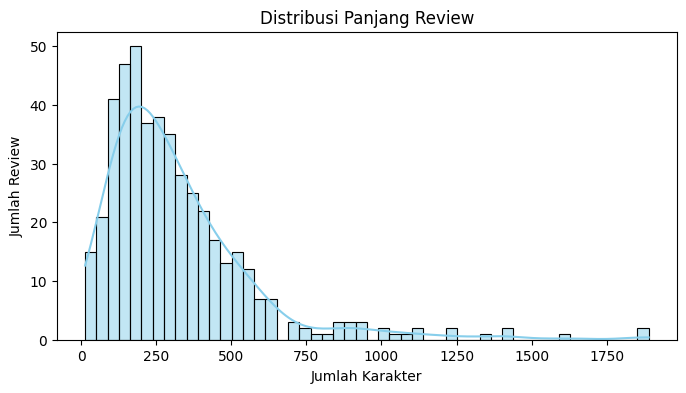

In [ ]:
df.loc[:, 'review_len'] = df['clean'].astype(str).apply(len)

plt.figure(figsize=(8,4))

sns.histplot(df['review_len'], bins=50, color='skyblue', kde=True)

plt.title("Distribusi Panjang Review")
plt.xlabel("Jumlah Karakter")
plt.ylabel("Jumlah Review")
plt.show()

## Top Kata

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Gabungkan semua review yang sudah dibersihkan (misal kolom "clean")
all_text_clean = " ".join(df['clean'].astype(str))

# Pisahkan kata-kata
words = re.findall(r'\w+', all_text_clean.lower())

# Hapus stopwords
words_filtered = [w for w in words if w not in stop_words]

# Hitung frekuensi kata
counter = Counter(words_filtered)
top10 = counter.most_common(10)

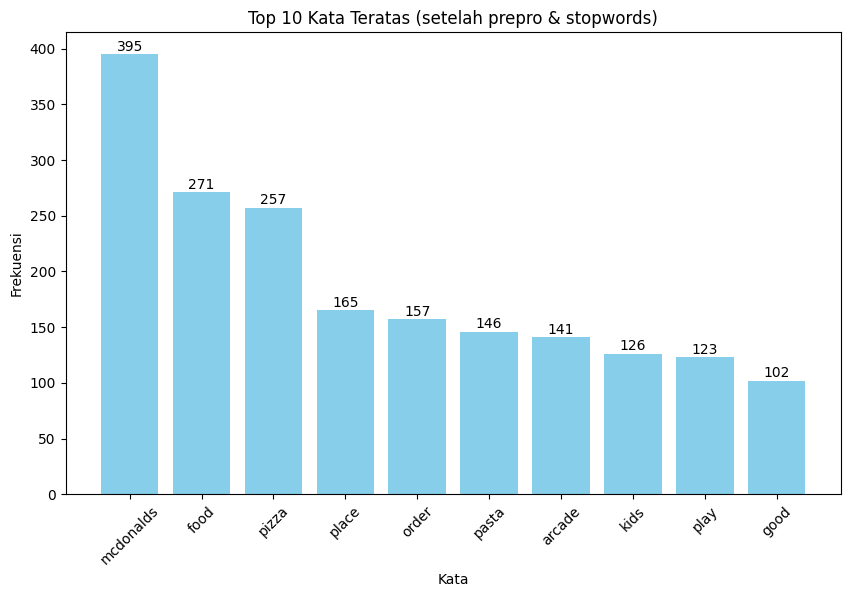

In [ ]:
# Siapkan data untuk bar chart
kata, freq = zip(*top10)

# Bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(kata, freq, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.title("Top 10 Kata Teratas (setelah prepro & stopwords)")
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
plt.show()

## Wordclouds

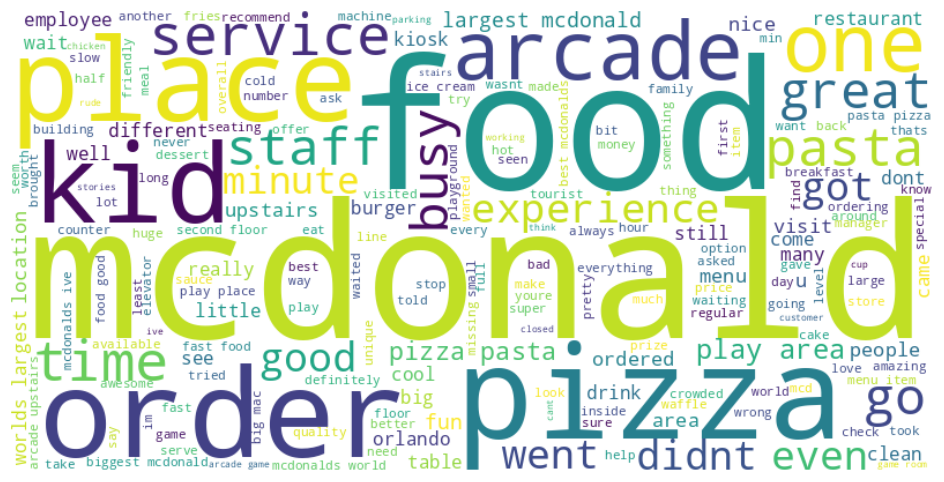

In [ ]:
from wordcloud import WordCloud

# Wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(words_filtered))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Sentiment Analysis

In [ ]:
!pip install -q langchain_community
!pip install -q replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 1.9 MB/s eta 0:00:00


In [ ]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata
# Set the API token
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token
# Model setup
granite = "ibm-granite/granite-3.2-8b-instruct"
output = Replicate(
    model=granite,
    replicate_api_token=api_token,
    )

In [ ]:
from tqdm import tqdm

In [ ]:
def analyze_sentiment(df, text_col='clean'):
    sentiments = []
    for review in tqdm(df[text_col], desc="Processing reviews"):
        prompt = f"""
You are an assistant specialized in sentiment analysis.

Classify the following McDonald's review into one of these categories:
- Positive: mainly expresses satisfaction or praise.
- Negative: mainly expresses dissatisfaction or complaints.
- Neutral: objective, mixed, or unclear sentiment.

Rules:
1. Only output one label: Positive, Negative, or Neutral.
2. Do not add explanations or extra text.

Review:
\"\"\"{review}\"\"\"

Answer:"""

        response = output.invoke(prompt)
        label = response.strip()
        sentiments.append(label)

    df['sentiment'] = sentiments
    return df

In [ ]:
df = analyze_sentiment(df)
print(df[['clean', 'sentiment']].head())

Processing reviews: 100%|██████████| 460/460 [07:33<00:00,  1.01it/s]

                                                   clean sentiment
13570  great experience food was great the ice cream ...  Positive
13571  the staffs were very friendly and our food was...   Neutral
13572  love the worlds largest mcdonalds has a kids p...  Positive
13573  my experience visiting this place was not good...  Negative
13574  this mcdonalds is one of the nicest and cooles...  Positive



/tmp/ipython-input-4207723143.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = sentiments


In [ ]:
df.to_csv("/content/drive/MyDrive/Capstone Project/macdonals_sentiment.csv", index=False)

# Analysis

## Analytical Result

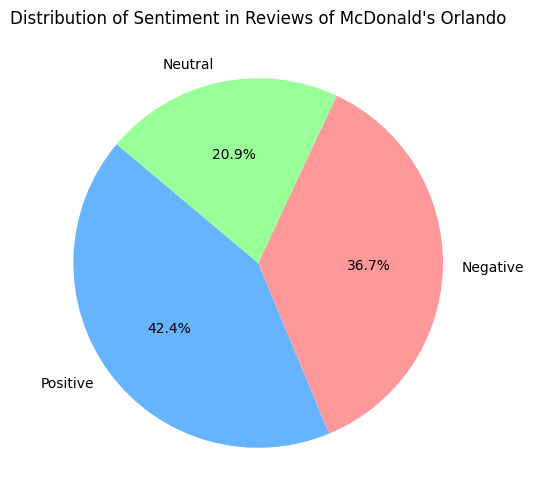

In [ ]:
sentiment_counts = df['sentiment'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999','#99ff99'])
plt.title("Distribution of Sentiment in Reviews of McDonald's Orlando")
plt.show()

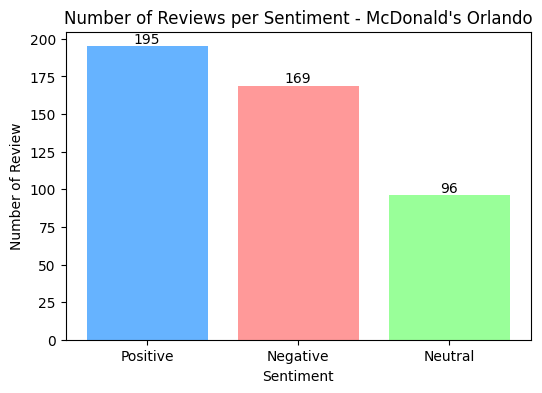

In [ ]:
# Bar chart
plt.figure(figsize=(6,4))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values,
               color=['#66b3ff','#ff9999','#99ff99'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, int(yval),
             ha='center', va='bottom', fontsize=10)

plt.xlabel("Sentiment")
plt.ylabel("Number of Review")
plt.title("Number of Reviews per Sentiment - McDonald's Orlando")
plt.show()

## Insight & Findings

### Top 10 Positive

In [ ]:
positive_reviews = df[df['sentiment'] == 'Positive']['clean']
all_positive_text = " ".join(positive_reviews)
words = all_positive_text.split()
words = [word for word in words if word not in stop_words]
word_counts = Counter(words)

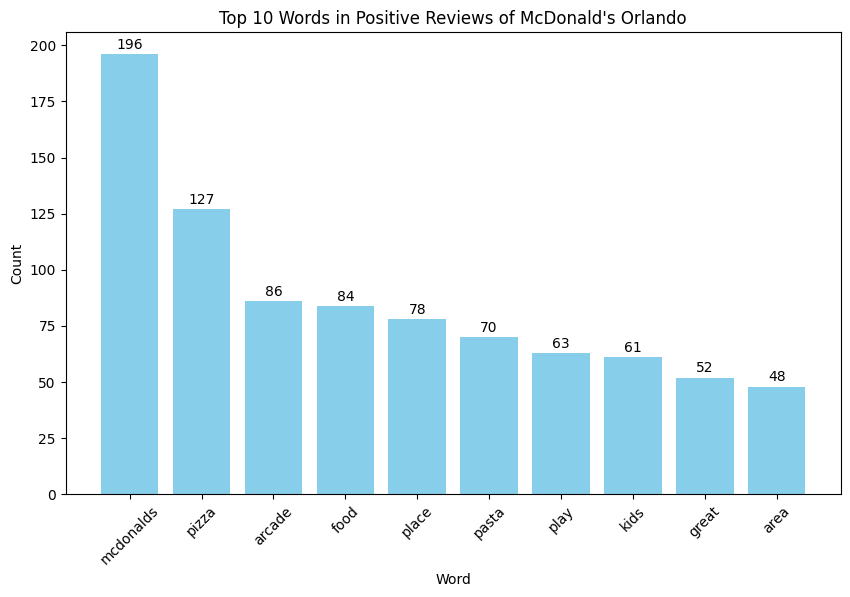

In [ ]:
top_10 = word_counts.most_common(10)
words, counts = zip(*top_10)

plt.figure(figsize=(10,6))
bars = plt.bar(words, counts, color='skyblue')

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, str(count), ha='center', va='bottom', fontsize=10)

plt.title("Top 10 Words in Positive Reviews of McDonald's Orlando")
plt.ylabel("Count")
plt.xlabel("Word")
plt.xticks(rotation=45)
plt.show()

### Top 10 Negative

In [ ]:
negative_reviews = df[df['sentiment'] == 'Negative']['clean']
all_negative_text = " ".join(negative_reviews)
words = all_negative_text.split()
words = [word for word in words if word not in stop_words]
word_counts_neg = Counter(words)

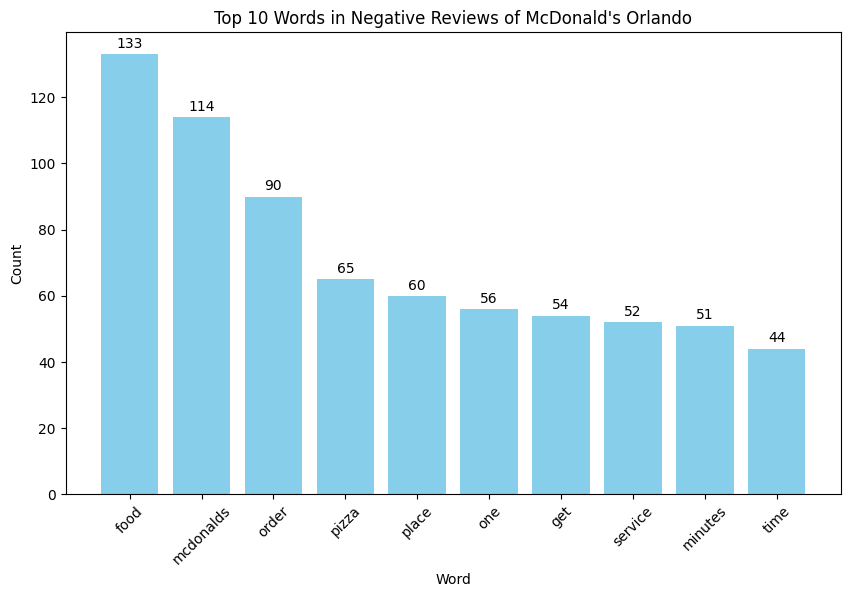

In [ ]:
top_10 = word_counts_neg.most_common(10)
words, counts = zip(*top_10)

plt.figure(figsize=(10,6))
bars = plt.bar(words, counts, color='skyblue')

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, str(count), ha='center', va='bottom', fontsize=10)

plt.title("Top 10 Words in Negative Reviews of McDonald's Orlando")
plt.ylabel("Count")
plt.xlabel("Word")
plt.xticks(rotation=45)
plt.show()